# Preliminary Analysis


Structure of dataset and task specification for the dataset

In [ ]:
import pandas as pd

splits = {'test': 'all/test-00000-of-00001.parquet', 'train': 'all/train-00000-of-00001.parquet', 'validation': 'all/validation-00000-of-00001.parquet'}
df_test = pd.read_parquet("hf://datasets/ehovy/race/" + splits["test"])
df_train = pd.read_parquet("hf://datasets/ehovy/race/" + splits["train"])
df_validation = pd.read_parquet("hf://datasets/ehovy/race/" + splits["validation"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
df_train.head()

,example_id,article,answer,question,options
0,high19088.txt,Last week I talked with some of my students ab...,C,We can know from the passage that the author w...,"[doctor, model, teacher, reporter]"
1,high19088.txt,Last week I talked with some of my students ab...,C,Many graduates today turn to cosmetic surgery ...,"[marry a better man/woman, become a model, get..."
2,high19088.txt,Last week I talked with some of my students ab...,D,"According to the passage, the author believes ...","[everyone should purchase perfection, whatever..."
3,high19088.txt,Last week I talked with some of my students ab...,B,Which' s the best title for the passage?.,"[Young Graduates Have Higher Expectations, You..."
4,high15596.txt,"YUZHOU, HENAN -An accident in a central China ...",B,What could be the best title for this passage?,"[Death Toll Rises in an Accident in China, A C..."


The dataset has 5 columns: **example_id** (the txt file name of question), **article** (the article question based on), **answer** (answer of question), **question** (question), **options** (multiple options of answers of the question).

In [ ]:
num_rows_train = df_train.shape[0]
num_rows_test = df_test.shape[0]
num_rows_validation = df_validation.shape[0]
num_rows = num_rows_test + num_rows_train + num_rows_validation
print(f"The dataset in total has {num_rows} rows.")
print(f"The train dataset has {num_rows_train} rows.")
print(f"The test dataset has {num_rows_test} rows.")
print(f"The validation dataset has {num_rows_validation} rows.")

The dataset in total has 97687 rows.
The train dataset has 87866 rows.
The test dataset has 4934 rows.
The validation dataset has 4887 rows.


Let's combine all the datasets and investigate the characteristics of the overall dataset

In [ ]:
# Combine all into one dataset
df = pd.concat([df_test, df_train, df_validation], ignore_index=True)

print(df.shape)  # Check the size

(97687, 5)


Let's check if overall dataset has null values so we can delete them

In [ ]:
print(df.isnull().values.any())

False


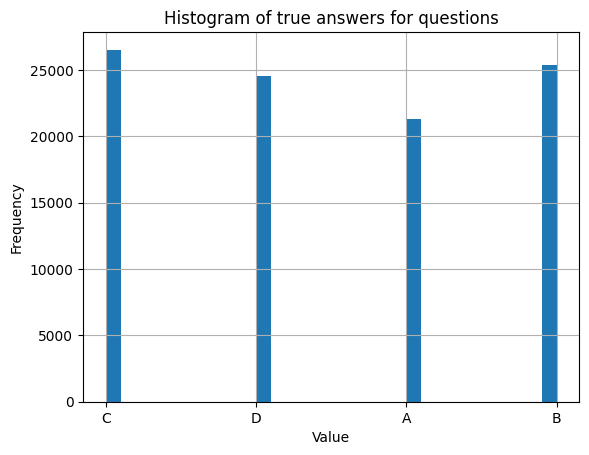

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df['answer'].hist(bins=30)  # You can adjust the number of bins
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of true answers for questions')
plt.show()

We have almost a balanced dataset. Also let's analyze the how long are the articles we are going to deal with.

In [ ]:
df['article_length'] = df['article'].apply(len) # adding article_length to dataset

# Now find the max and average length
max_length = df['article_length'].max()
average_length = df['article_length'].mean()

print(f"Max length of articles: {max_length} characters")
print(f"Average length of articles: {average_length:.2f} characters")

Max length of articles: 6437 characters
Average length of articles: 1558.38 characters


In [ ]:
df.head()

,example_id,article,answer,question,options,article_length
0,high19432.txt,The rain had continued for a week and the floo...,C,What did Nancy try to do before she fell over?,"[Measure the depth of the river, Look for a fa...",1569
1,high19432.txt,The rain had continued for a week and the floo...,D,The following are true according to the passag...,[It took Lizzie and Nancy about 20 minutes to ...,1569
2,high19432.txt,The rain had continued for a week and the floo...,A,What did the local people do to help those in ...,"[They put up shelter for them in a school., Th...",1569
3,high6268.txt,There is probably no field of human activity i...,B,The passage tells us that _ .,[our values and lifestyles are in no field of ...,1510
4,high6268.txt,There is probably no field of human activity i...,B,"Traditionally,people usually thought that _ .","[men cared very much for clothes, women were c...",1510


For an idea, we may need to eliminate some of the articles which are too long regards to the others (treating them outliers).

Is there any question with empty or meaningless value?

In [ ]:
meaningless_questions = df[df['question'].str.strip() == '?']
for i in range(1):
    print(meaningless_questions['article'].iloc[i])
    print(meaningless_questions['options'].iloc[i])
    print(meaningless_questions['answer'].iloc[i])

Mrs. Black has four sons. Dick is six years old. David is five. Dean and Denis  are four. The boys don't go to school. They play soccer every day. So their clothes are always very dirty . Mrs. Black has to wash  clothes for them.
Today is Sunday. Mrs. Black is washing clothes for her sons. Dean comes in and asks her, "Mom, when is your birthday?"
"May 15th," says Mrs. Black, "and it's in next month."
"Will we have a birthday party, Mom?"
"Yes," she says. "We will have a big and great party at home."
"What _ do you want for your birthday?" asks the little boy.
"Four clean  boys."
"Oh, that's great! Then I will have another  four brothers! And we can play soccer together," the boy says happily.
['It is April now.'
 "The boys' father washes clothes for the boys every day."
 'Mrs. Black wants to have eight sons.'
 'The boys will wash clothes for their mother.']
A


In [ ]:
white_space_questions = df[df['question'].str.strip() == ' ']
empty_questions = df[df['question'].str.strip() == '']
if white_space_questions.empty:
    print("There is no white space question in dataset.")
if empty_questions.empty:
    print("There is no empty question in dataset.")

There is no white space question in dataset.
There is no empty question in dataset.


 In our dataset we noticed some questions which has only '?' value but then when we inspect them, they are just true or false questions so we decided to keep them in our dataset but from this maybe we can understand while doing tokenization we should not remove '?' punctuation because it has a meaning in this context.

# Indexing and Search Engine

Now we are going to index our documents (articles column) so that we can apply keyword search over them. We are going to use the same method we learned in out tutorials.

In [ ]:
!pip install -q python-terrier==0.11.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.5/119.5 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 859.0/859.0 kB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.0/288.0 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.6/69.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.0/135.0 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.5 MB/s eta 0:00:00


In [ ]:
import pyterrier as pt

if not pt.started():
  pt.init()

<ipython-input-12-ff2ffbf0b6dd>:3: DeprecationWarning: Call to deprecated function (or staticmethod) started. (use pt.java.started() instead) -- Deprecated since version 0.11.0.
  if not pt.started():


terrier-assemblies 5.11 jar-with-dependencies not found, downloading to /root/.pyterrier...
Done
terrier-python-helper 0.0.8 jar not found, downloading to /root/.pyterrier...
Done


Java started and loaded: pyterrier.java, pyterrier.terrier.java [version=5.11 (build: craig.macdonald 2025-01-13 21:29), helper_version=0.0.8]
<ipython-input-12-ff2ffbf0b6dd>:4: DeprecationWarning: Call to deprecated method pt.init(). Deprecated since version 0.11.0.
java is now started automatically with default settings. To force initialisation early, run:
pt.java.init() # optional, forces java initialisation
  pt.init()


In [ ]:
# Create an iterator over your dataframe
def iter_df(df):
    for i, row in df.iterrows():
        yield {
            'docno': str(i),  # Document ID (make sure it's unique)
            'text': row['article']  # The actual text to be indexed
        }

# Path to store the index
index_path = './article_index'

# Create the indexer
indexer = pt.index.IterDictIndexer(index_path, overwrite=True)

# Index your dataframe (indexing only 'article' column)
index_ref = indexer.index(iter_df(df_train), fields=['text'], meta=['docno'])

print("Indexing done.")

Indexing done.


In [ ]:
index = pt.IndexFactory.of(index_ref)
print(index.getCollectionStatistics().toString())

Number of documents: 87866
Number of terms: 52723
Number of postings: 8165411
Number of fields: 1
Number of tokens: 11976570
Field names: [text]
Positions:   false



In [ ]:
query = "volcano"

tfidf = pt.BatchRetrieve(index, wmodel="TF_IDF")
tfidf.search(query)

<ipython-input-15-6921f9e424cb>:3: DeprecationWarning: Call to deprecated class BatchRetrieve. (use pt.terrier.Retriever() instead) -- Deprecated since version 0.11.0.
  tfidf = pt.BatchRetrieve(index, wmodel="TF_IDF")


,qid,docid,docno,rank,score,query
0,1,27118,27118,0,8.740726,volcano
1,1,27119,27119,1,8.740726,volcano
2,1,27120,27120,2,8.740726,volcano
3,1,27121,27121,3,8.740726,volcano
4,1,19784,19784,4,8.566788,volcano
...,...,...,...,...,...,...
324,1,2856,2856,324,2.809046,volcano
325,1,2857,2857,325,2.809046,volcano
326,1,2858,2858,326,2.809046,volcano
327,1,38413,38413,327,2.670867,volcano


How to see if our query engine is good? There is data studio page for our RACE dataset and we can generate a SQL query and compare its' results with our search engine. The search engine we built is based on just training dataset to compare with the SQL query easily.

# Training Models

In [ ]:
df_train

,example_id,article,answer,question,options
0,high19088.txt,Last week I talked with some of my students ab...,C,We can know from the passage that the author w...,"[doctor, model, teacher, reporter]"
1,high19088.txt,Last week I talked with some of my students ab...,C,Many graduates today turn to cosmetic surgery ...,"[marry a better man/woman, become a model, get..."
2,high19088.txt,Last week I talked with some of my students ab...,D,"According to the passage, the author believes ...","[everyone should purchase perfection, whatever..."
3,high19088.txt,Last week I talked with some of my students ab...,B,Which' s the best title for the passage?.,"[Young Graduates Have Higher Expectations, You..."
4,high15596.txt,"YUZHOU, HENAN -An accident in a central China ...",B,What could be the best title for this passage?,"[Death Toll Rises in an Accident in China, A C..."
...,...,...,...,...,...
87861,middle2313.txt,"Last year when Tom graduated from school, he c...",B,Tom came to the station to _ .,"[find a job, take the train home, sell the tic..."
87862,middle2313.txt,"Last year when Tom graduated from school, he c...",C,The woman walked to Tom because _ .,"[she was Tom's old friend, her child wanted to..."
87863,middle2313.txt,"Last year when Tom graduated from school, he c...",D,Tom didn't take the train because _ .,"[he didn't take a train ticket, he missed the ..."
87864,middle2313.txt,"Last year when Tom graduated from school, he c...",B,The old man wanted to _ .,"[lend Tom some money, give Tom a job, say ""Tha..."


Let's combine the article, question and one option at a time with labeling it as true or false. So for each row we are going to create four rows for each option of the question.

In [ ]:
def convert_dataframe(df):
  flattened_rows = []

  # Loop through the DataFrame
  for _, row in df.iterrows():
      article = row['article']
      question = row['question']
      options = row['options']
      correct_idx = ord(row['answer']) - ord('A')  # Convert A-D to 0-3

      for idx, option in enumerate(options):
          flattened_rows.append({
              'article': article,
              'question': question,
              'option': option,
              'label': int(idx == correct_idx)
          })

  # Create new DataFrame
  return pd.DataFrame(flattened_rows)

df_new_train = convert_dataframe(df_train)
df_new_test = convert_dataframe(df_test)
df_new_validation = convert_dataframe(df_validation)

Now we have a new dataframe for train


In [ ]:
df_new_train

,article,question,option,label
0,Last week I talked with some of my students ab...,We can know from the passage that the author w...,doctor,0
1,Last week I talked with some of my students ab...,We can know from the passage that the author w...,model,0
2,Last week I talked with some of my students ab...,We can know from the passage that the author w...,teacher,1
3,Last week I talked with some of my students ab...,We can know from the passage that the author w...,reporter,0
4,Last week I talked with some of my students ab...,Many graduates today turn to cosmetic surgery ...,marry a better man/woman,0
...,...,...,...,...
351459,"Last year when Tom graduated from school, he c...",The old man wanted to _ .,sit on the bench with Tom,0
351460,"Last year when Tom graduated from school, he c...",What can we learn from this story?,Many people find job in a train station.,0
351461,"Last year when Tom graduated from school, he c...",What can we learn from this story?,Don't buy the last ticket of the train.,0
351462,"Last year when Tom graduated from school, he c...",What can we learn from this story?,"If we try our best to help others, others will...",1


In [ ]:
df_new_test

,article,question,option,label
0,The rain had continued for a week and the floo...,What did Nancy try to do before she fell over?,Measure the depth of the river,0
1,The rain had continued for a week and the floo...,What did Nancy try to do before she fell over?,Look for a fallen tree trunk,0
2,The rain had continued for a week and the floo...,What did Nancy try to do before she fell over?,Protect her cows from being drowned,1
3,The rain had continued for a week and the floo...,What did Nancy try to do before she fell over?,Run away from the flooded farm,0
4,The rain had continued for a week and the floo...,The following are true according to the passag...,It took Lizzie and Nancy about 20 minutes to g...,0
...,...,...,...,...
19731,"When you look at the sky at night, the moon lo...",The passage tells us _ .,the sun is one of the farthest stars to us,0
19732,"When you look at the sky at night, the moon lo...","Why do we call the sun ""a life giving star""?",Because it gives us warmth.,0
19733,"When you look at the sky at night, the moon lo...","Why do we call the sun ""a life giving star""?",Because there are some living things on it.,0
19734,"When you look at the sky at night, the moon lo...","Why do we call the sun ""a life giving star""?",Because plants and animals can't live without it.,1


In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Combine context, question, and option into one input string
df_new_train['text'] = (
    "Article: " + df_new_train['article'] +
    " Question: " + df_new_train['question'] +
    " Option: " + df_new_train['option']
)

df_new_train

,article,question,option,label,text
0,Last week I talked with some of my students ab...,We can know from the passage that the author w...,doctor,0,Article: Last week I talked with some of my st...
1,Last week I talked with some of my students ab...,We can know from the passage that the author w...,model,0,Article: Last week I talked with some of my st...
2,Last week I talked with some of my students ab...,We can know from the passage that the author w...,teacher,1,Article: Last week I talked with some of my st...
3,Last week I talked with some of my students ab...,We can know from the passage that the author w...,reporter,0,Article: Last week I talked with some of my st...
4,Last week I talked with some of my students ab...,Many graduates today turn to cosmetic surgery ...,marry a better man/woman,0,Article: Last week I talked with some of my st...
...,...,...,...,...,...
351459,"Last year when Tom graduated from school, he c...",The old man wanted to _ .,sit on the bench with Tom,0,Article: Last year when Tom graduated from sch...
351460,"Last year when Tom graduated from school, he c...",What can we learn from this story?,Many people find job in a train station.,0,Article: Last year when Tom graduated from sch...
351461,"Last year when Tom graduated from school, he c...",What can we learn from this story?,Don't buy the last ticket of the train.,0,Article: Last year when Tom graduated from sch...
351462,"Last year when Tom graduated from school, he c...",What can we learn from this story?,"If we try our best to help others, others will...",1,Article: Last year when Tom graduated from sch...


In [ ]:
!pip install transformers datasets tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 21.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: dill
    Found existing installation: dill 0.4.0
    Uninstalling dill-0.4.0:
      Successfully uninstalled dill-0.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64

In [ ]:
from transformers import BertTokenizer
import tensorflow as tf

# Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
encodings = tokenizer(
    list(df_new_train['text']),
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='tf'
)

labels = tf.convert_to_tensor(df_new_train['label'].values)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((
    dict(encodings),
    labels
))
dataset = dataset.shuffle(1000).batch(8)


In [ ]:
from transformers import TFBertForSequenceClassification

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# Train
model.fit(dataset, epochs=3)

## NLP Processing Techniques

Let's explore some key NLP processing techniques that we can apply to our RACE dataset analysis.

In [ ]:
import nltk
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import numpy as np

# Ensure NLTK data is downloaded
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

### Text Preprocessing

Here we'll apply standard text preprocessing steps to our sample article from the dataset:
1. Lowercasing
2. Removing special characters and numbers
3. Tokenization
4. Stopword removal
5. Stemming/Lemmatization

In [ ]:
# Let's take a sample article from the dataset
sample_article = df['article'].iloc[0]
print("Original article (first 300 chars):")
print(sample_article[:300], "...\n")

# 1. Lowercasing
lowercase_text = sample_article.lower()
print("1. After lowercasing (first 100 chars):")
print(lowercase_text[:100], "...\n")

# 2. Removing special characters and numbers
cleaned_text = re.sub(r'[^\w\s]', ' ', lowercase_text)
cleaned_text = re.sub(r'\d+', ' ', cleaned_text)
print("2. After removing special characters and numbers (first 100 chars):")
print(cleaned_text[:100], "...\n")

# 3. Tokenization
# Sentence tokenization
sentences = sent_tokenize(cleaned_text)
print("3a. Sentence tokenization:")
print(f"Number of sentences: {len(sentences)}")
print(f"First sentence: {sentences[0]}\n")

# Word tokenization
words = word_tokenize(cleaned_text)
print("3b. Word tokenization:")
print(f"Number of words: {len(words)}")
print(f"First 20 words: {words[:20]}\n")

# 4. Stopword removal
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]
print("4. After stopword removal:")
print(f"Number of words after removal: {len(filtered_words)}")
print(f"First 20 words: {filtered_words[:20]}\n")

# 5. Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]
print("5. After stemming:")
print(f"First 20 stemmed words: {stemmed_words[:20]}\n")

# 6. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
print("6. After lemmatization:")
print(f"First 20 lemmatized words: {lemmatized_words[:20]}")

### Feature Extraction

Now let's transform our text data into numerical features using techniques like:
1. Bag of Words (CountVectorizer)
2. TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Sample 5 articles
sample_articles = df['article'].head(5).tolist()

# 1. Bag of Words (CountVectorizer)
print("1. Bag of Words (CountVectorizer)")
# Limit max_features for better visualization
count_vectorizer = CountVectorizer(max_features=20)
count_matrix = count_vectorizer.fit_transform(sample_articles)
count_df = pd.DataFrame(
    count_matrix.toarray(),
    columns=count_vectorizer.get_feature_names_out()
)
print("\nFeature names (vocabulary):")
print(count_vectorizer.get_feature_names_out())
print("\nDocument-term matrix (showing only first 5 terms for readability):")
print(count_df.iloc[:, :5])
print()

# 2. TF-IDF Vectorization
print("2. TF-IDF Vectorization")
# Limit max_features for better visualization
tfidf_vectorizer = TfidfVectorizer(max_features=20)
tfidf_matrix = tfidf_vectorizer.fit_transform(sample_articles)
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf_vectorizer.get_feature_names_out()
)
print("\nFeature names (vocabulary):")
print(tfidf_vectorizer.get_feature_names_out())
print("\nDocument-term matrix (showing only first 5 terms for readability):")
print(tfidf_df.iloc[:, :5])

### Document Clustering

Let's perform document clustering on our sample articles to identify patterns and group similar documents together.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Take a larger sample for clustering
sample_size = 100
if len(df) > sample_size:
    sample_articles = df['article'].sample(sample_size, random_state=42).tolist()
else:
    sample_articles = df['article'].tolist()

# Use TF-IDF vectorization for clustering
tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = tfidf_vectorizer.fit_transform(sample_articles)

# Apply K-means clustering
num_clusters = 3  # You can adjust this
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(tfidf_matrix)

# Apply PCA for visualization
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

# Plot the clusters
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    # Select points in this cluster
    points = reduced_features[clusters == i]
    plt.scatter(points[:, 0], points[:, 1], label=f'Cluster {i}')

plt.title('Document Clusters of Articles')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Analyze clusters - get top terms per cluster
def get_top_terms_per_cluster(vectorizer, cluster_centers, n_terms=5):
    # Get feature names (words)
    feature_names = np.array(vectorizer.get_feature_names_out())
    
    # For each cluster center
    top_terms = {}
    for i, center in enumerate(cluster_centers):
        # Get indices of top n_terms from the cluster center
        sorted_indices = center.argsort()[::-1][:n_terms]
        top_terms[i] = feature_names[sorted_indices]
    
    return top_terms

# Get top terms for each cluster
top_cluster_terms = get_top_terms_per_cluster(tfidf_vectorizer, kmeans.cluster_centers_)

print("Top terms per cluster:")
for cluster, terms in top_cluster_terms.items():
    print(f"Cluster {cluster}: {', '.join(terms)}")

### Analysis of Questions and Answers

Let's analyze the distribution of questions and answers in the dataset.

In [ ]:
# Distribution of answers (A, B, C, D)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='answer')
plt.title('Distribution of Answers')
plt.xlabel('Answer')
plt.ylabel('Count')
plt.show()

# Question length analysis
df['question_length'] = df['question'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(df['question_length'], bins=50)
plt.title('Distribution of Question Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.show()

print("\nQuestion length statistics:")
print(df['question_length'].describe())

# Option length analysis
df['options_count'] = df['options'].apply(len)
print("\nOptions count statistics:")
print(df['options_count'].describe())

# Article length analysis
df['article_length'] = df['article'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(df['article_length'], bins=50)
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.show()

print("\nArticle length statistics:")
print(df['article_length'].describe())

### Word Embeddings

Let's explore the use of Word2Vec to create word embeddings for our dataset.

In [ ]:
try:
    import gensim
    from gensim.models import Word2Vec
    from sklearn.manifold import TSNE
    
    # Prepare sentences for Word2Vec
    print("Preparing text for Word2Vec training...")
    # Take a sample of articles for faster processing
    sample_size = 50
    if len(df) > sample_size:
        sample_articles = df['article'].sample(sample_size, random_state=42).tolist()
    else:
        sample_articles = df['article'].tolist()
        
    # Tokenize each document into sentences, then words
    sentences = []
    for article in sample_articles:
        for sent in sent_tokenize(article.lower()):
            sentences.append(word_tokenize(sent))
    
    # Train Word2Vec model
    print("Training Word2Vec model...")
    w2v_model = Word2Vec(sentences=sentences, vector_size=100, window=5, 
                         min_count=2, workers=4, sg=1)
    
    # Find similar words to common education terms
    test_words = ['student', 'teacher', 'school', 'learn']
    for word in test_words:
        try:
            similar_words = w2v_model.wv.most_similar(word, topn=5)
            print(f"\nWords most similar to '{word}':")
            for similar_word, similarity in similar_words:
                print(f"  {similar_word}: {similarity:.4f}")
        except KeyError:
            print(f"'{word}' not in vocabulary")
    
    # Visualize word embeddings using t-SNE
    def visualize_embeddings(model, words=None, n=30):
        """Visualize word embeddings using t-SNE"""
        # Get most frequent words if words not specified
        if words is None:
            all_word_vectors = model.wv.vectors
            if len(all_word_vectors) <= n:
                words = [word for word in model.wv.index_to_key]
            else:
                words = [model.wv.index_to_key[i] for i in range(n)]
        
        # Filter words to only include those in the model's vocabulary
        valid_words = [word for word in words if word in model.wv]
        
        # If too few words, exit
        if len(valid_words) < 5:
            print("Too few valid words to visualize")
            return
            
        # Get word vectors for valid words
        word_vectors = [model.wv[word] for word in valid_words]
        word_vectors_array = np.array(word_vectors)
        
        # Apply t-SNE
        print(f"Applying t-SNE to {len(valid_words)} word vectors...")
        perplexity_value = min(30, max(5, len(valid_words)-1))
        tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity_value)
        embeddings_2d = tsne.fit_transform(word_vectors_array)
        
        # Visualize
        plt.figure(figsize=(12, 10))
        for i, word in enumerate(valid_words):
            plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
            plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
        
        plt.title('t-SNE visualization of Word2Vec embeddings')
        plt.xlabel('t-SNE Component 1')
        plt.ylabel('t-SNE Component 2')
        plt.tight_layout()
        plt.show()
    
    # Visualize common words
    # Get the 30 most common words
    all_words = [word for sent in sentences for word in sent]
    from collections import Counter
    word_counter = Counter(all_words)
    most_common = [word for word, _ in word_counter.most_common(30)]
    
    print("\nVisualizing embeddings for most common words:")
    visualize_embeddings(w2v_model, most_common)
    
except ImportError:
    print("Gensim library not installed. Install with: pip install gensim")
except Exception as e:
    print(f"Error during Word2Vec processing: {str(e)}")

## Transformer Models for Reading Comprehension

Transformer models like BERT have revolutionized NLP tasks, particularly for reading comprehension tasks like those in the RACE dataset.

### Key Benefits of Transformers for Reading Comprehension:

1. **Bidirectional Context**: Models like BERT understand context from both directions
2. **Pre-training and Fine-tuning**: Leverage knowledge from massive text corpora
3. **Attention Mechanisms**: Focus on relevant parts of the text for answering questions
4. **Superior Performance**: State-of-the-art results on reading comprehension benchmarks

In the RACE_Analysis notebook, we've implemented a transformer-based model for the multiple-choice reading comprehension task.

## Conclusion

In this notebook, we've explored various NLP techniques that can be applied to the RACE dataset:

1. **Text Preprocessing**: Cleaned and normalized text data
2. **Feature Extraction**: Converted text to numerical features
3. **Document Clustering**: Grouped similar articles together
4. **Word Embeddings**: Created dense vector representations of words
5. **Data Analysis**: Analyzed the distribution of questions and answers

For a complete implementation of reading comprehension models on the RACE dataset, see the RACE_Analysis.ipynb notebook, which includes:
- Traditional machine learning baseline models
- Advanced transformer-based models
- Comprehensive evaluation metrics